# Analyse E-commerce Product Reviews using NLP 

## **Import Packages**

In [1]:
# Import the following libraries
import pandas as pd
import numpy as np
from collections import defaultdict
from collections import Counter
import csv

# NLTK libraries
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()


# Visualization libraries
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image # for world cloud image

# Spacy for preprocessing
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')

#Spell checker
!pip install pyspellchecker
from spellchecker import SpellChecker

# Modelling
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

# xgboost
import xgboost as xgb

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam


# To change date to datetime
from datetime import datetime
import time
import re 

from collections import Counter
import string
import scipy.sparse

# Textblob
from textblob import TextBlob

# Gensim libraries
!pip install pyLDAvis
from gensim import corpora, models, similarities, matutils
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis.gensim
from gensim.models import CoherenceModel


# To show all the columns
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 300)

# to pickle dataframe
import pickle

# Avoid warnings
import warnings
warnings.filterwarnings("ignore")


# Enable logging for gensim - optional but important
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

from IPython.display import clear_output
clear_output()

In [2]:
# Visualization libraries
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image # for world cloud image

# Spacy for preprocessing
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')

#Spell checker
#!pip install pyspellchecker
from spellchecker import SpellChecker

# Modelling
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

# xgboost
import xgboost as xgb

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam


# To change date to datetime
from datetime import datetime
import time
import re 

from collections import Counter
import string
import scipy.sparse

# Textblob
from textblob import TextBlob

# Gensim libraries
!pip install pyLDAvis
from gensim import corpora, models, similarities, matutils
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis.gensim
from gensim.models import CoherenceModel


# To show all the columns
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 300)

# to pickle dataframe
import pickle

# Avoid warnings
import warnings
warnings.filterwarnings("ignore")


# Enable logging for gensim - optional but important
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

from IPython.display import clear_output
#clear_output()

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


## **Load the Dataset**

In [3]:
#df = pd.read_csv("/content/drive/My Drive/GrammarandProductReviews.csv")
df = pd.read_csv("GrammarandProductReviews.csv")

In [4]:
df.head(3)
df=df.iloc[:7000,:]

# **Text Pre-processing**

In [5]:
print("Shape :", df.shape)

Shape : (7000, 25)


In [6]:
print("Columns :")
print(df.columns)

Columns :
Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc'],
      dtype='object')


### **Rename the Columns**

In [7]:
# Rename the column names
col_names = df.columns
new_col_names = [i.replace(".","_") for i in col_names]
df.columns = new_col_names

In [8]:
df.columns

Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews_date',
       'reviews_dateAdded', 'reviews_dateSeen', 'reviews_didPurchase',
       'reviews_doRecommend', 'reviews_id', 'reviews_numHelpful',
       'reviews_rating', 'reviews_sourceURLs', 'reviews_text', 'reviews_title',
       'reviews_userCity', 'reviews_userProvince', 'reviews_username', 'upc'],
      dtype='object')

In [9]:
print("Datatypes :\n",df.dtypes)

Datatypes :
 id                       object
brand                    object
categories               object
dateAdded                object
dateUpdated              object
ean                      object
keys                     object
manufacturer             object
manufacturerNumber       object
name                     object
reviews_date             object
reviews_dateAdded        object
reviews_dateSeen         object
reviews_didPurchase      object
reviews_doRecommend      object
reviews_id              float64
reviews_numHelpful      float64
reviews_rating            int64
reviews_sourceURLs       object
reviews_text             object
reviews_title            object
reviews_userCity         object
reviews_userProvince     object
reviews_username         object
upc                      object
dtype: object


In [10]:
print("Info :")
print(df.info())

Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 25 columns):
id                      7000 non-null object
brand                   7000 non-null object
categories              7000 non-null object
dateAdded               7000 non-null object
dateUpdated             7000 non-null object
ean                     3865 non-null object
keys                    7000 non-null object
manufacturer            7000 non-null object
manufacturerNumber      6982 non-null object
name                    7000 non-null object
reviews_date            6986 non-null object
reviews_dateAdded       7000 non-null object
reviews_dateSeen        7000 non-null object
reviews_didPurchase     2460 non-null object
reviews_doRecommend     6449 non-null object
reviews_id              2460 non-null float64
reviews_numHelpful      4244 non-null float64
reviews_rating          7000 non-null int64
reviews_sourceURLs      7000 non-null object
reviews_text            6998 n

In [11]:
print("Missing Value Count :")
print(df.isnull().sum())

Missing Value Count :
id                         0
brand                      0
categories                 0
dateAdded                  0
dateUpdated                0
ean                     3135
keys                       0
manufacturer               0
manufacturerNumber        18
name                       0
reviews_date              14
reviews_dateAdded          0
reviews_dateSeen           0
reviews_didPurchase     4540
reviews_doRecommend      551
reviews_id              4540
reviews_numHelpful      2756
reviews_rating             0
reviews_sourceURLs         0
reviews_text               2
reviews_title             55
reviews_userCity        6511
reviews_userProvince    6974
reviews_username          25
upc                        0
dtype: int64


### **Percentage of missing values per column**

In [12]:
print("Percentage of missing values :")
print(df.isna().mean().round(4) * 100)

Percentage of missing values :
id                       0.00
brand                    0.00
categories               0.00
dateAdded                0.00
dateUpdated              0.00
ean                     44.79
keys                     0.00
manufacturer             0.00
manufacturerNumber       0.26
name                     0.00
reviews_date             0.20
reviews_dateAdded        0.00
reviews_dateSeen         0.00
reviews_didPurchase     64.86
reviews_doRecommend      7.87
reviews_id              64.86
reviews_numHelpful      39.37
reviews_rating           0.00
reviews_sourceURLs       0.00
reviews_text             0.03
reviews_title            0.79
reviews_userCity        93.01
reviews_userProvince    99.63
reviews_username         0.36
upc                      0.00
dtype: float64


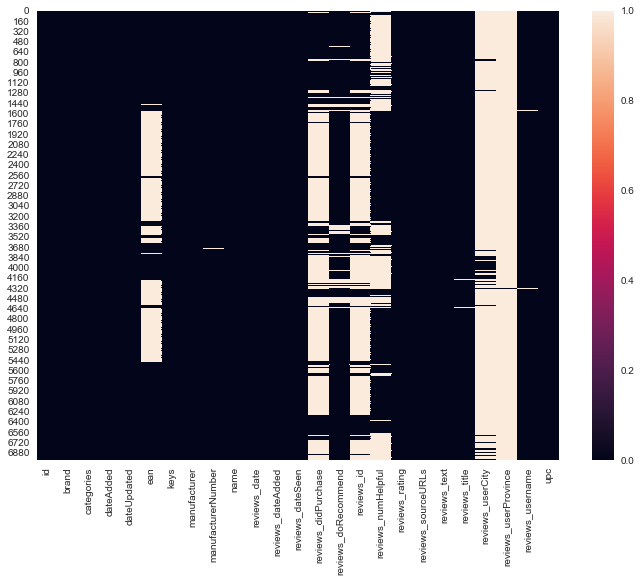

In [13]:
#Visualization of Missing Values

# Plot it
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=df.isnull())
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()



In [14]:
print("Total Missing Value Count : ", df.isnull().sum().values.sum())

Total Missing Value Count :  29121


In [15]:
# Drop the columns with less than 20% of values
missing_val_threshold = len(df) * .2
df.dropna(thresh = missing_val_threshold, axis = 1, inplace = True)

In [16]:
df.columns

Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews_date',
       'reviews_dateAdded', 'reviews_dateSeen', 'reviews_didPurchase',
       'reviews_doRecommend', 'reviews_id', 'reviews_numHelpful',
       'reviews_rating', 'reviews_sourceURLs', 'reviews_text', 'reviews_title',
       'reviews_username', 'upc'],
      dtype='object')

In [17]:
# Shape of Dataset
df.shape

(7000, 23)

In [18]:
# Drop the rows where "reviews.text" or "reviews.date" feature has Null values
df.dropna(subset=['reviews_text','reviews_date'], inplace=True)

In [19]:
# Shape of Dataset
df.shape

(6984, 23)

In [20]:
print("Percentage of missing values :")
print(df.isna().mean().round(4) * 100)

Percentage of missing values :
id                      0.00
brand                   0.00
categories              0.00
dateAdded               0.00
dateUpdated             0.00
ean                    44.85
keys                    0.00
manufacturer            0.00
manufacturerNumber      0.26
name                    0.00
reviews_date            0.00
reviews_dateAdded       0.00
reviews_dateSeen        0.00
reviews_didPurchase    64.78
reviews_doRecommend     7.66
reviews_id             64.78
reviews_numHelpful     39.25
reviews_rating          0.00
reviews_sourceURLs      0.00
reviews_text            0.00
reviews_title           0.79
reviews_username        0.32
upc                     0.00
dtype: float64


### **Combine Review Text and Title into one**

In [21]:
# Joining Review Text and Title 
df['Review'] = df['reviews_title'].map(str) + " " + df['reviews_text'] 

### **Lowercasing**

In [22]:
# Lowercasing the reviews and title column
df['Review'] = df['Review'].apply(lambda x : x.lower())

In [23]:
df['Review'][0]

"just awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy."

### **Remove Punctuation**

In [24]:
# Remove punctuation 
df['Review'] = df['Review'].str.replace('[^\w\s]','')

In [25]:
df['Review'][0]

'just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it 5star rating all the way her metaphors are just crazy'

### **Remove Stopwords**

In [26]:
# Remove Stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [27]:
df['Review'][0]

'awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphors crazy'

### **Lemmatization**

In [28]:
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [29]:
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [30]:
df['Review']=df['Review'].apply(lambda x: lemmatize_sentence(x))

In [31]:
df['Review'].shape

(6984,)

In [32]:
spell = SpellChecker()
spell.correction('tigar')

'tiger'

### **Spelling Correction**

In [33]:
spell = SpellChecker()

df['Review']=df['Review'].apply(lambda x: ' '.join(spell.correction(word) for word in nltk.word_tokenize(x)))

In [35]:
#df.to_csv("/content/drive/My Drive/Updated_GrammarandProductReviews.csv")
df.to_csv("Updated_GrammarandProductReviews.csv")

### **Normalization**
https://sentic.net/microtext-normalization.pdf

### **Standarization**

### **Noise Removal**

In [36]:
def scrub_words(text):
    """Basic cleaning of texts."""
    
    # remove html markup
    text=re.sub("(<.*?>)","",text)
    
    #remove non-ascii and digits
    text=re.sub("(\\W|\\d)"," ",text)
    
    #remove whitespace
    text=text.strip()
    return text

In [37]:
df['Review']=df['Review'].apply(lambda x: scrub_words(x))

In [38]:
df['Review'][0]

'awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy'

### **Word Count**

In [39]:
df['Review_WC'] = df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review_WC','Review']].head(3)

,Review_WC,Review
0,20,awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy
1,7,good good flavor review collect part promotion
2,3,good good flavor


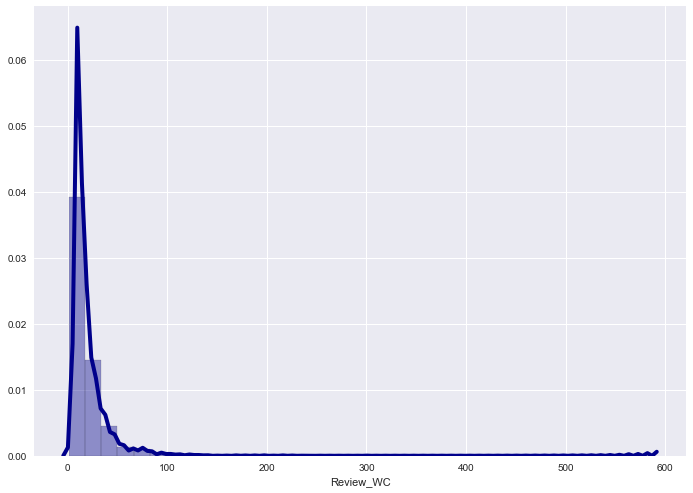

In [40]:
# Density Plot and Histogram of all Word Count
sns.distplot(df['Review_WC'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

### **Character Count**

In [41]:
df['Review_CC'] = df['Review'].str.len() ## this also includes spaces
df[['Review_CC','Review']].head(3)

,Review_CC,Review
0,115,awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy
1,46,good good flavor review collect part promotion
2,16,good good flavor


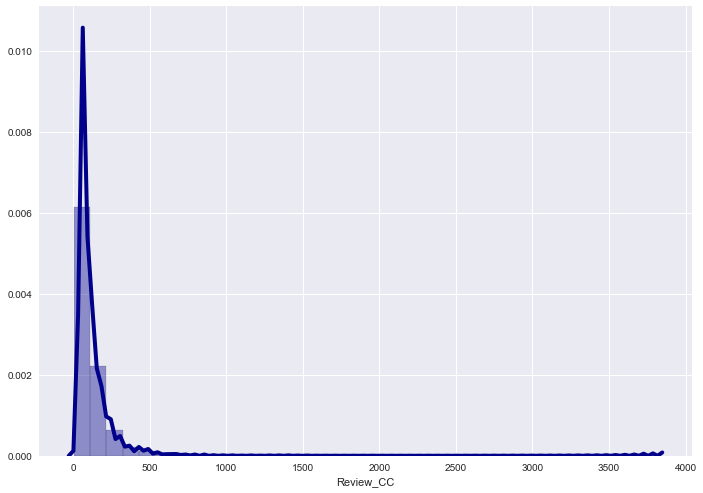

In [42]:
# Density Plot and Histogram of all Character Count
sns.distplot(df['Review_CC'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

### **Average Word Length**

In [43]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['Review_AWL'] = df["Review"].apply(lambda x: avg_word(x))
df[['Review_AWL','Review']].head(3)

,Review_AWL,Review
0,4.800000,awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy
1,5.714286,good good flavor review collect part promotion
2,4.666667,good good flavor


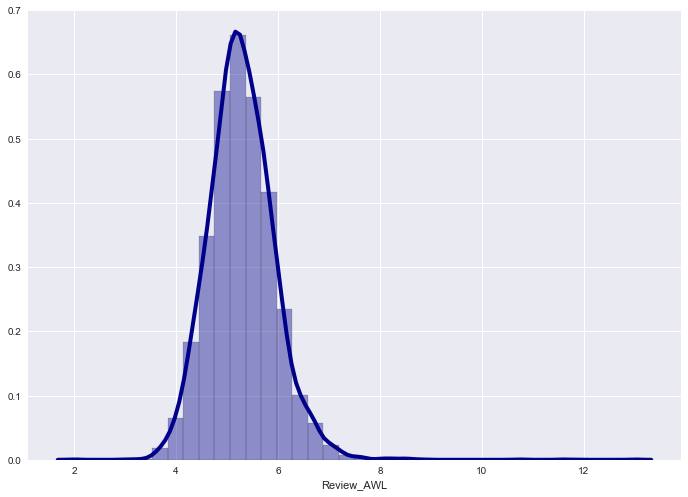

In [44]:
# Density Plot and Histogram of Average Word Length
sns.distplot(df['Review_AWL'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

### **Top 30 Common Words**

In [45]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,10))
  ax = sns.barplot(data=d, x= "count", y = "word")
  ax.set(ylabel = 'Word')
  plt.show()

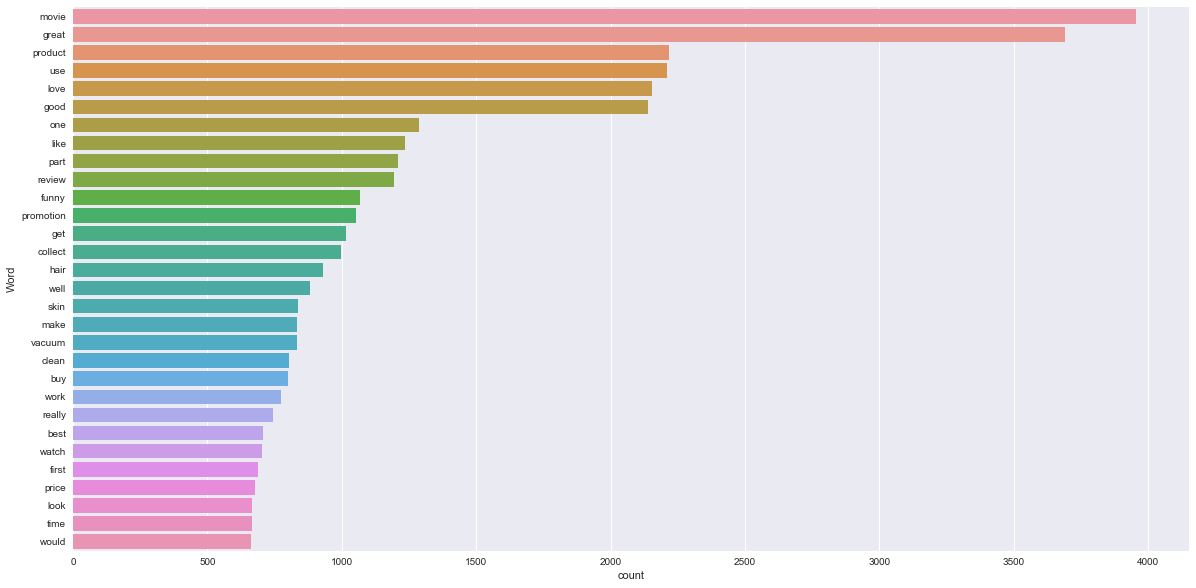

In [46]:
freq_words(df['Review'])

### **Top 30 Rare Words**

In [47]:
# function to plot least frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nsmallest(columns="count", n = terms) 
  plt.figure(figsize=(20,10))
  ax = sns.barplot(data=d, x= "count", y = "word")
  ax.set(ylabel = 'Word')
  plt.show()

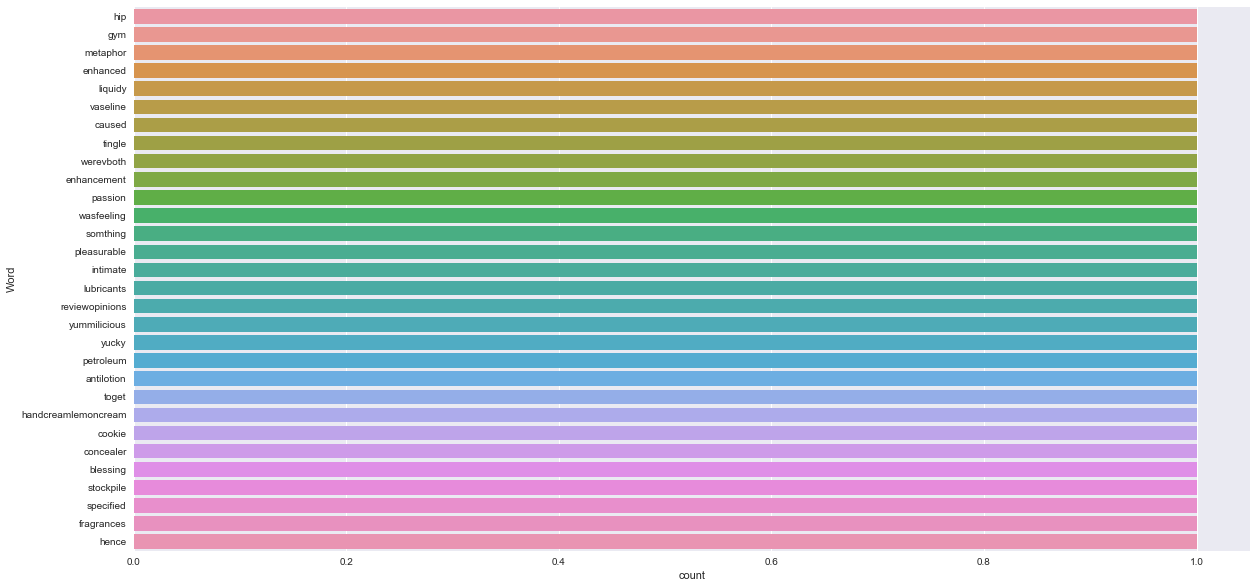

In [48]:
freq_words(df['Review'])

### **N-grams using TextBlob**

In [49]:
# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = TextBlob(data).ngrams(num)
    return [ ' '.join(grams) for grams in n_grams]
 

In [50]:

data = df['Review'][0]
print("Input Text :",data)

print("1-gram: ", extract_ngrams(data, 1))
print("2-gram: ", extract_ngrams(data, 2))
print("3-gram: ", extract_ngrams(data, 3))
print("4-gram: ", extract_ngrams(data, 4))

Input Text : awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy
1-gram:  ['awesome', 'love', 'album', 'good', 'hip', 'hop', 'side', 'current', 'pop', 'sound', 'hype', 'listen', 'everyday', 'gym', 'give', 'star', 'rating', 'way', 'metaphor', 'crazy']
2-gram:  ['awesome love', 'love album', 'album good', 'good hip', 'hip hop', 'hop side', 'side current', 'current pop', 'pop sound', 'sound hype', 'hype listen', 'listen everyday', 'everyday gym', 'gym give', 'give star', 'star rating', 'rating way', 'way metaphor', 'metaphor crazy']
3-gram:  ['awesome love album', 'love album good', 'album good hip', 'good hip hop', 'hip hop side', 'hop side current', 'side current pop', 'current pop sound', 'pop sound hype', 'sound hype listen', 'hype listen everyday', 'listen everyday gym', 'everyday gym give', 'gym give star', 'give star rating', 'star rating way', 'rating way metaphor', 'way metaphor crazy']
4-gram:  ['awesome love album 

### **Term Frequency**

In [51]:
df_tf = (df['Review'][0:1]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
df_tf.columns = ['words','tf']
df_tf

,words,tf
0,listen,1
1,metaphor,1
2,pop,1
3,side,1
4,everyday,1
5,hype,1
6,rating,1
7,gym,1
8,awesome,1
9,album,1


### **IDF**

In [52]:
for i,word in enumerate(df_tf['words']):
  df_tf.loc[i, 'idf'] = np.log(df_tf.shape[0]/(len(df[df['Review'].str.contains(word)])))


In [53]:
df_tf

,words,tf,idf
0,listen,1,0.597837
1,metaphor,1,2.995732
2,pop,1,-0.974560
3,side,1,-2.960105
4,everyday,1,-0.854415
5,hype,1,1.897120
6,rating,1,-0.336472
7,gym,1,2.995732
8,awesome,1,-2.859340
9,album,1,-0.048790


### **TF-IDF**

In [54]:
df_tf['tfidf'] = df_tf['tf'] * df_tf['idf']
df_tf

,words,tf,idf,tfidf
0,listen,1,0.597837,0.597837
1,metaphor,1,2.995732,2.995732
2,pop,1,-0.974560,-0.974560
3,side,1,-2.960105,-2.960105
4,everyday,1,-0.854415,-0.854415
5,hype,1,1.897120,1.897120
6,rating,1,-0.336472,-0.336472
7,gym,1,2.995732,2.995732
8,awesome,1,-2.859340,-2.859340
9,album,1,-0.048790,-0.048790


### **Transforming Reviews Date to Python DateTime Format**

In [55]:
# Convert the Rating Date column in datetime format
df['reviews_date'] = df['reviews_date'].str.replace(".000Z","")
df['reviews_date'] = df['reviews_date'].str.replace("Z","")

In [56]:
date = []
for i,j in enumerate(df['reviews_date']): 
  try :
    date.append(datetime.strptime(j, "%Y-%m-%dT%H:%M:%S"))
  except:
    print(i)
    j = df['reviews_date'][0]
    date.append(datetime.strptime(j, "%Y-%m-%dT%H:%M:%S"))

  
df['reviews_date'] = date

# **Exploratory Data Analysis**

### **Unique Values**

In [57]:
for i in ['brand', 'categories','manufacturer','name','reviews_id','reviews_rating']:
  print("No. of unique values in %s is : %s" %(i, df[i].nunique()))

No. of unique values in brand is : 84
No. of unique values in categories is : 91
No. of unique values in manufacturer is : 87
No. of unique values in name is : 91
No. of unique values in reviews_id is : 2450
No. of unique values in reviews_rating is : 5


### **Distribution of top 25 reviewed brands**

In [58]:
df['brand'] = df['brand'].replace("L'oreal Paris","L'Oreal Paris")
df['brand'] = df['brand'].replace("Sony","Sony Pictures")

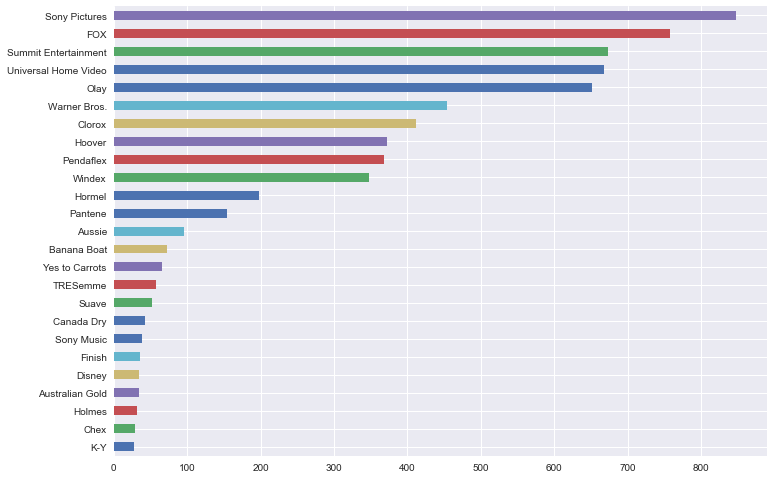

In [59]:
df['brand'].value_counts()[0:25].sort_values().plot(kind = 'barh')

### **Distribution of reviewed categories**

In [60]:
df["product_cat"] = df["categories"].apply(lambda x: x.split(",")[0])

df['product_cat'] = df['product_cat'].replace("Movies","Movies & TV Shows")
df['product_cat'] = df['product_cat'].replace("Food","Food & Beverage")
df['product_cat'] = df['product_cat'].replace("Household Chemicals","Household Essentials")
df['product_cat'] = df['product_cat'].replace("Music on CD or Vinyl","Musical Instruments & Karaoke")
df['product_cat'] = df['product_cat'].replace("Pro Audio","Musical Instruments & Karaoke")
df['product_cat'] = df['product_cat'].replace("Baby","Kids")
df['product_cat'] = df['product_cat'].replace("Kids' Rooms","Kids")
df['product_cat'] = df['product_cat'].replace("Brand Shop","Household Essentials")
df['product_cat'] = df['product_cat'].replace("Featured Brands","Household Essentials")
df['product_cat'] = df['product_cat'].replace("Home Improvement","Household Essentials")
df['product_cat'] = df['product_cat'].replace("Furniture","Household Essentials")
df['product_cat'] = df['product_cat'].replace("Video Games","Sports & Outdoors")
df['product_cat'] = df['product_cat'].replace("Home","Household Essentials")
df['product_cat'] = df['product_cat'].replace("Mobile","Electronics")
df['product_cat'] = df['product_cat'].replace("Photography","Electronics")
df['product_cat'] = df['product_cat'].replace("Patio & Garden","Accessories")
df['product_cat'] = df['product_cat'].replace("Gift Finder","Accessories")
df['product_cat'] = df['product_cat'].replace("Auto & Tires","Accessories")
df['product_cat'] = df['product_cat'].replace("Kitchen & Dining","Food & Beverage")


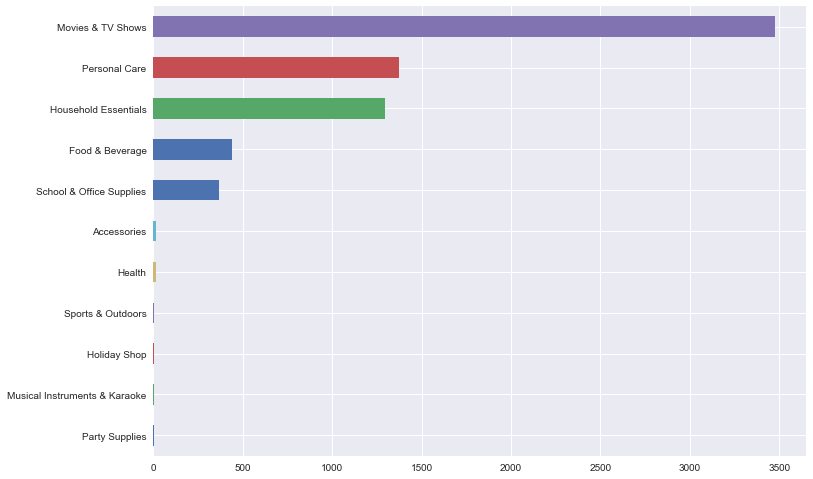

In [61]:
df['product_cat'].value_counts()[0:25].sort_values().plot(kind = 'barh')

### **Distribution of top 25 reviewed manufactures**

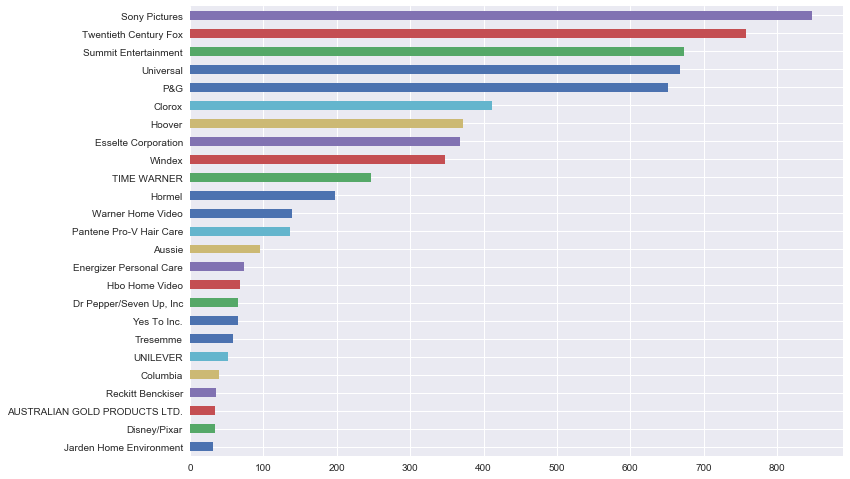

In [62]:
df['manufacturer'] = df['manufacturer'].replace("L'oreal Paris","L'Oreal Paris")
df['manufacturer'] = df['manufacturer'].replace("SONY CORP","Sony Pictures")
df['manufacturer'].value_counts()[0:25].sort_values().plot(kind = 'barh')

### **Distribution of Review Ratings**

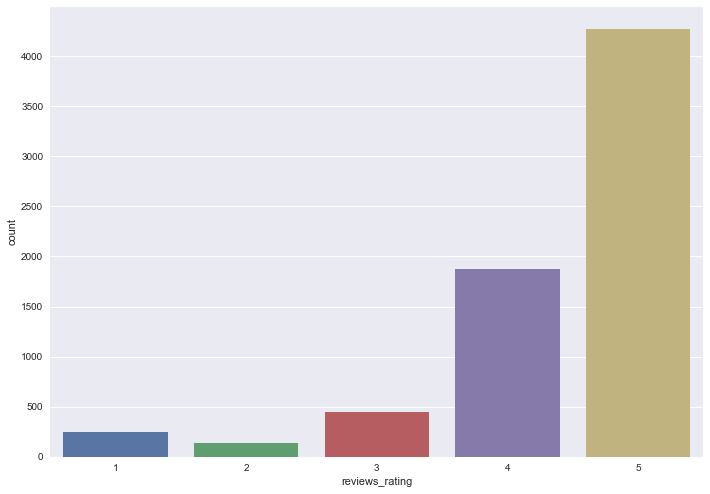

In [63]:
# Density Plot and Histogram of Reviews Ratings
sns.countplot(df['reviews_rating'])

### **Year Wise Ratings**

In [64]:
df['year'], df['day'], df['month'] = df['reviews_date'].dt.year, df['reviews_date'].dt.day, df['reviews_date'].dt.month

In [65]:
df['hour'], df['minute'], df['second'] = df['reviews_date'].dt.hour, df['reviews_date'].dt.minute, df['reviews_date'].dt.second

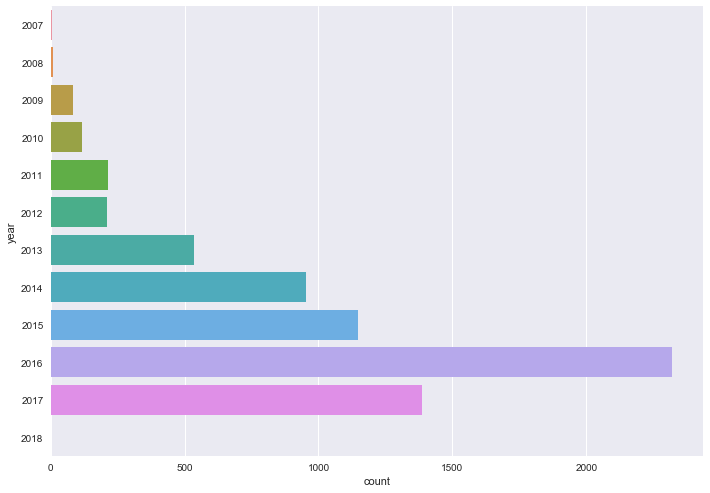

In [66]:
sns.countplot(y=df['year'])

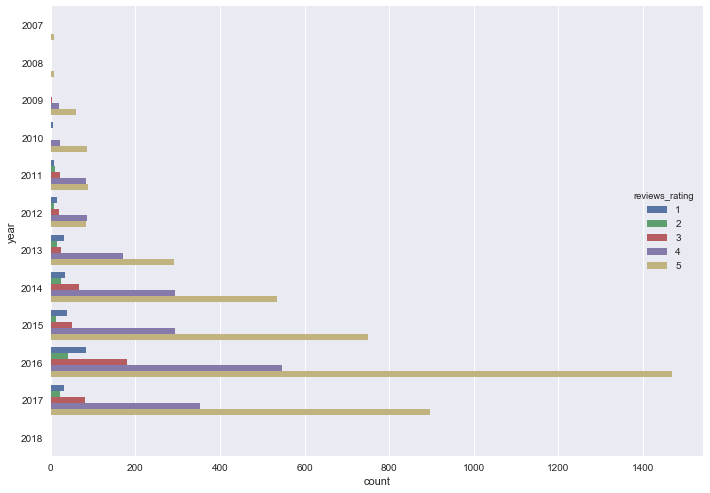

In [67]:
sns.countplot(y=df['year'], hue=df['reviews_rating'])

### **Hour Wise Ratings**

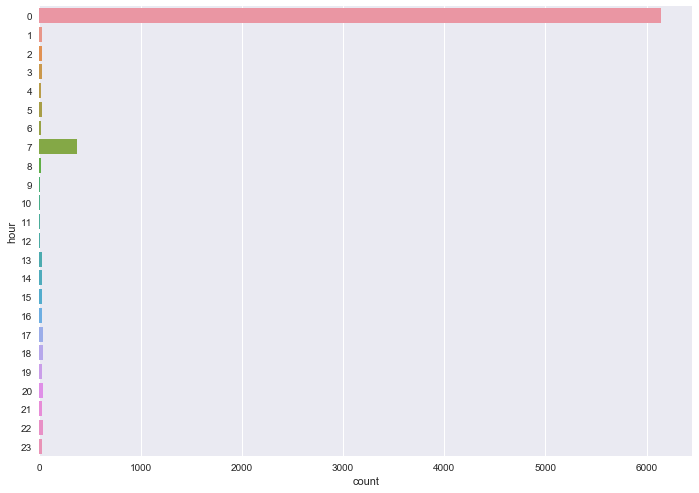

In [68]:
sns.countplot(y=df['hour'])

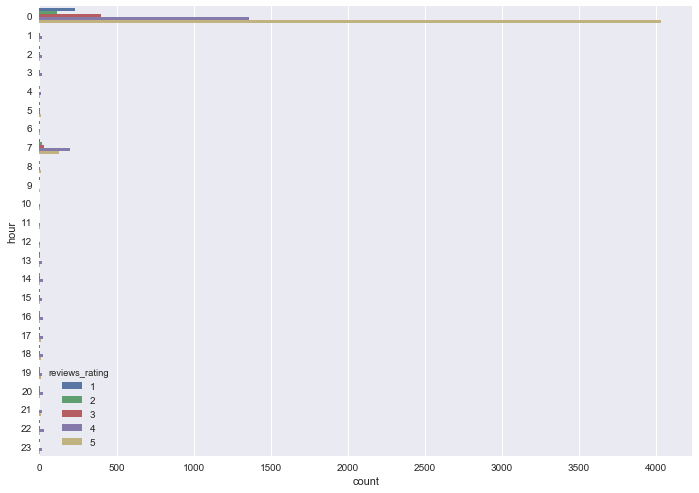

In [69]:
sns.countplot(y=df['hour'], hue=df['reviews_rating'])

### **Category vs Ratings**

In [70]:
df['product_cat'].nunique()

11

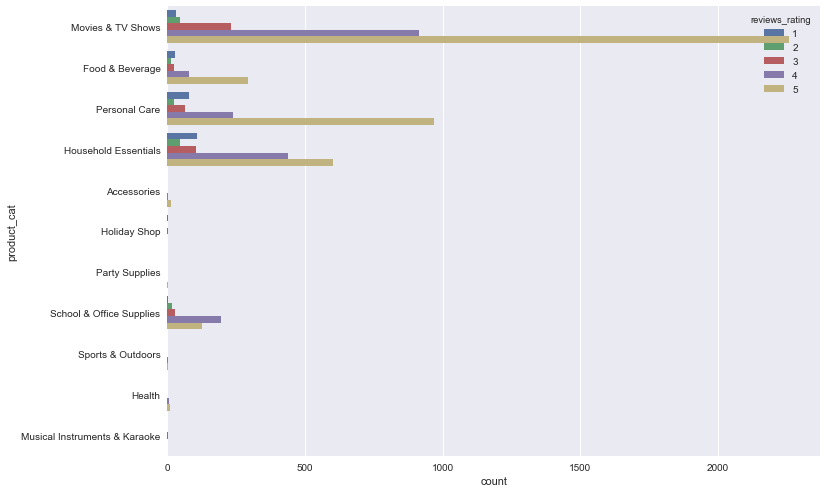

In [71]:
sns.countplot(y=df['product_cat'], hue=df['reviews_rating'])

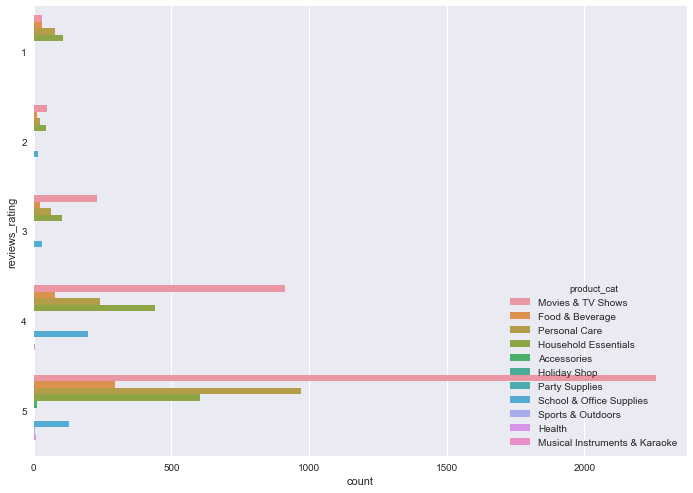

In [72]:
sns.countplot(y=df['reviews_rating'], hue=df['product_cat'])

### **Brands vs Ratings**

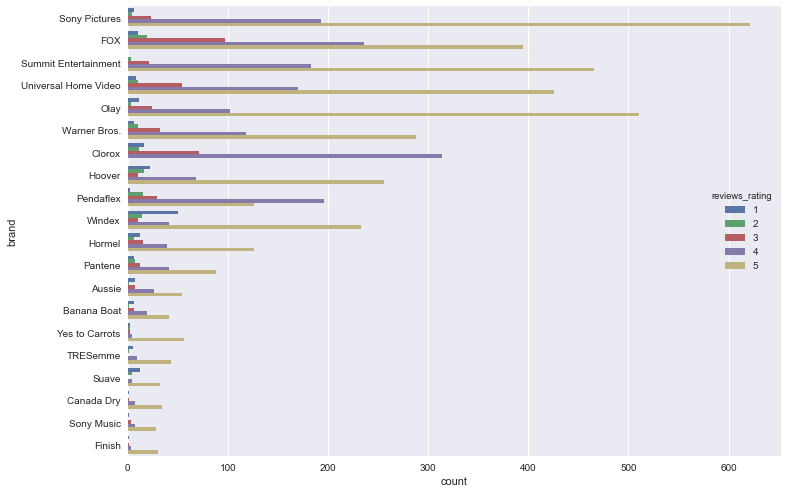

In [73]:
sns.countplot(y=df['brand'], hue=df['reviews_rating'], order=df['brand'].value_counts().iloc[:20].index)

### **Word Clouds**

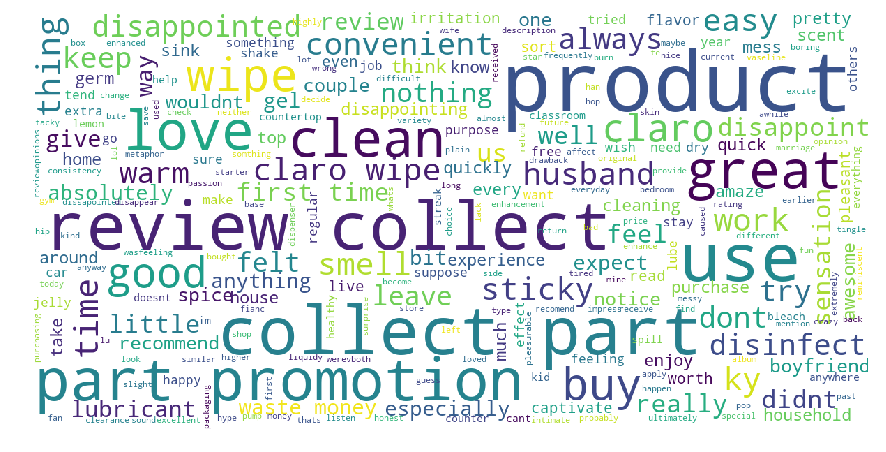

In [74]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['Review'])

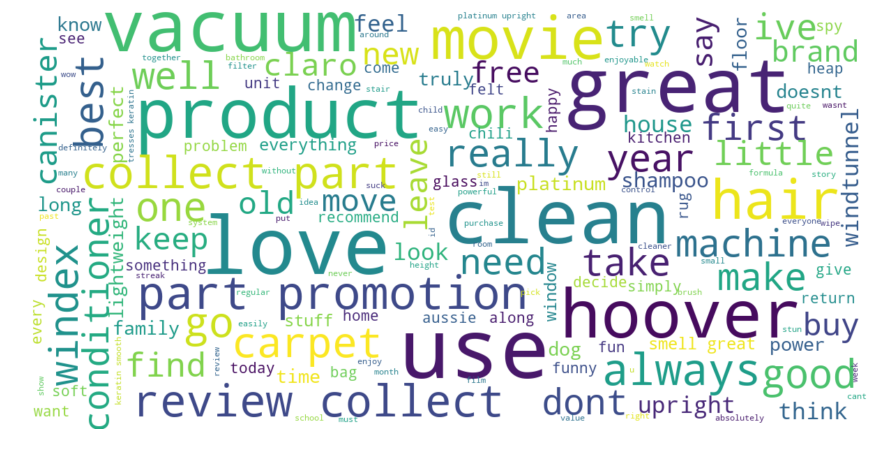

In [75]:
# alternate code, seems to yield different results
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=3,
        random_state=1).generate(str(df['Review'].value_counts()))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

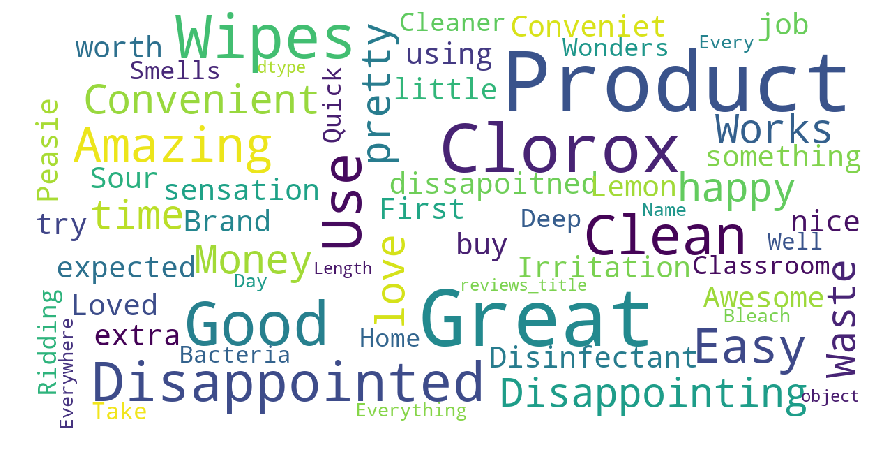

In [76]:
show_wordcloud(df['reviews_title'])
# Great = 10938, great = 3133
# Disappointed = 156, disappointed = 75, Disappointing = 50, disappointing = 25, dissapoitned = 

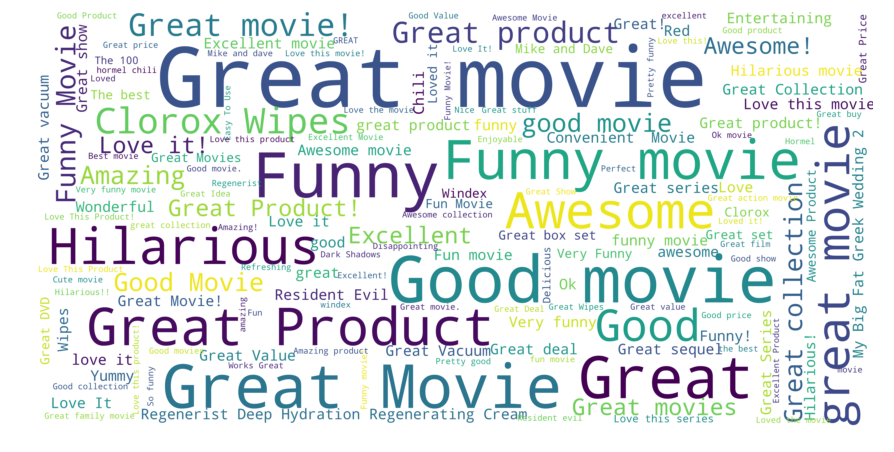

In [77]:
# alternate code, seems to yield different results
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=400, max_font_size=40, scale=30,
        random_state=1).generate_from_frequencies((df['reviews_title'].value_counts()  ))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

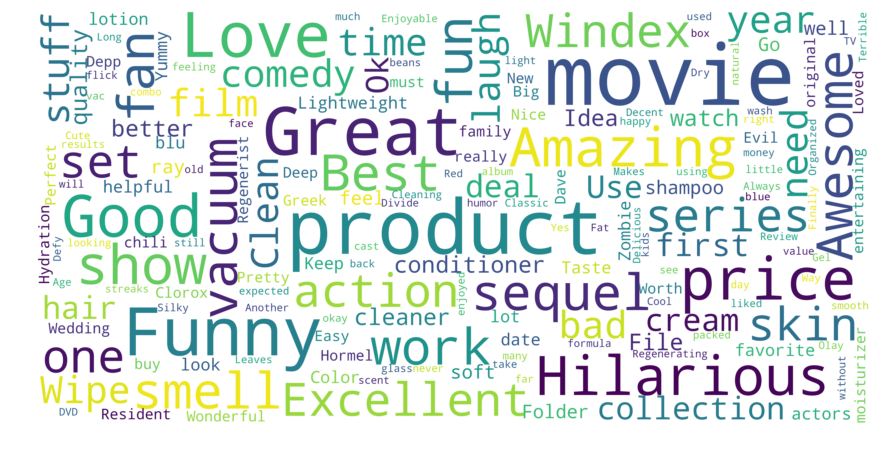

In [78]:
# try to tokenize to individual word (uni-gram) - reviews.title
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['reviews_title'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [79]:
len(big_list)  # reviews_title


22534

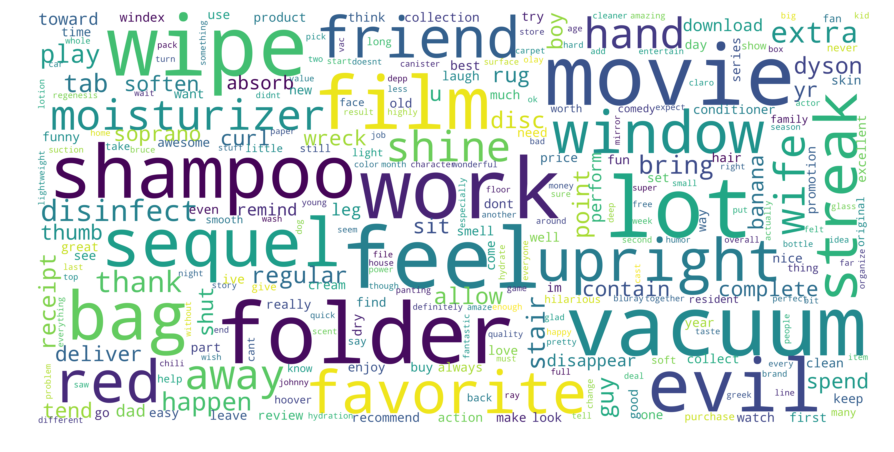

In [80]:
# try to tokenize to individual word (uni-gram) - reviews.text
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['Review'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [81]:
len(big_list)   # reviews_text


137836

### **Genuine Reviews**

In [82]:
# on the reviews.didPurchase column, replace 38,886 null fields with "Null"
df['reviews_didPurchase'].fillna('Null', inplace=True)


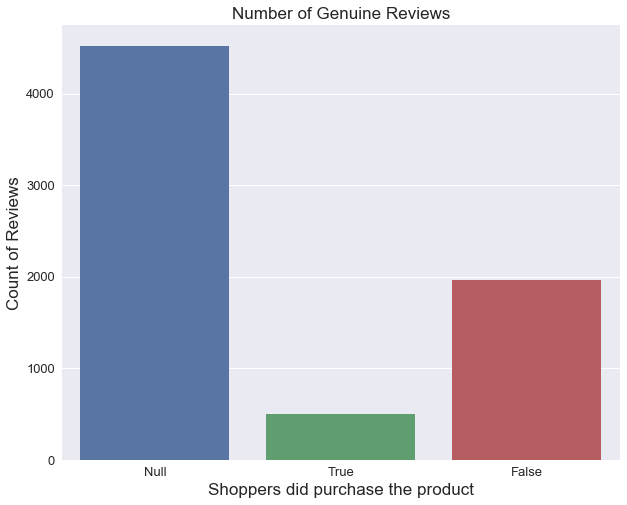

In [83]:
plt.figure(figsize=(10,8))
ax = sns.countplot(df['reviews_didPurchase'])
ax.set_xlabel(xlabel="Shoppers did purchase the product", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Number of Genuine Reviews', fontsize=17)
ax.tick_params(labelsize=13)

In [84]:
df['reviews_didPurchase'].value_counts()


Null     4524
False    1963
True      497
Name: reviews_didPurchase, dtype: int64

In [85]:
# shoppers who did purchased the product and provided the review = 5%
print("Percentage of genuine reviews :",368200/(38785 + 28474))

Percentage of genuine reviews : 5.474360308657578


### **Correlation Map**

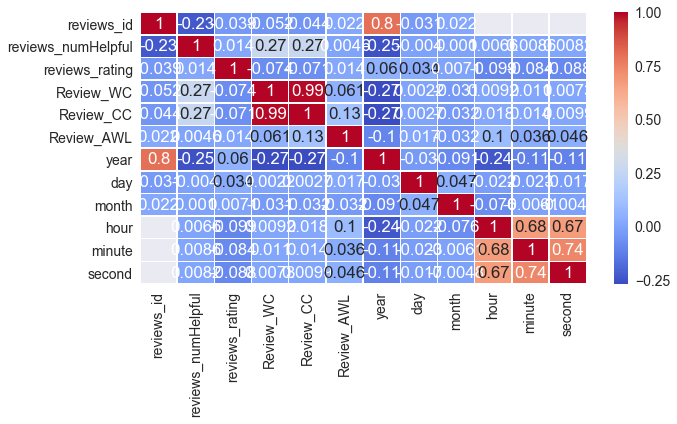

In [86]:
# not much info in the correlation map
sns.set(font_scale=1.4)
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linewidths=.5)

### **Most Bought Product**

In [87]:
# "The Foodsaver174 10 Cup Fresh Container - Fac10-000" is purchased almost 500 times
df_genuine = df[df['reviews_didPurchase'] == True]
df_genuine['name'].value_counts()

Hormel Chili, No Beans                                                                           91
Red (special Edition) (dvdvideo)                                                                 41
Yes To Carrots Nourishing Body Wash                                                              35
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                                            33
Australian Gold Exotic Blend Lotion, SPF 4                                                       22
Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com    21
Chex Muddy Buddies Brownie Supreme Snack Mix                                                     18
Ragu Roasted Garlic Parmesan Pasta Sauce                                                         16
Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz                                      16
Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans                                                  15


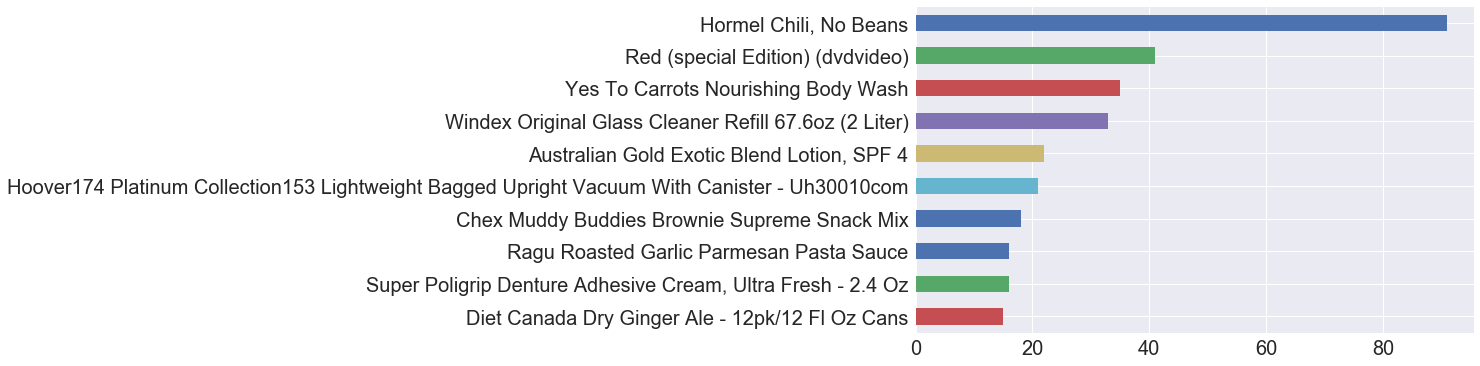

In [88]:
df_genuine['name'].value_counts()[0:10].plot(kind ='barh', figsize=[10,6], fontsize=20).invert_yaxis()

### **Most purchased Product - 5 Rating**

In [110]:
df_mbp = df_genuine[df_genuine['name'] == 'Hormel Chili, No Beans']
df_mbp = df_mbp[df_mbp['reviews_rating']==5]
# keep relevant columns only
df_mbp = df_mbp[[ 'reviews_rating', 'Review']]
df_mbp.head(3)

,reviews_rating,Review
6445,5,great taste texture perfect chili dog
6450,5,chili lol never ask review can good chili people cylinder shape package phenomenal love sound pop top consistent reliable product son love fritos roll
6452,5,best purchase special chili dog item good quality work great


### **Most purchased Product - 1 Rating**

In [100]:
# filter most purchased product with 1 star rating
df_lvp = df_genuine[df_genuine['name'] == 'Hormel Chili, No Beans']
df_lvp = df_lvp[df_lvp['reviews_rating']==2]
# keep relevant columns only
df_lvp = df_lvp[[ 'reviews_rating', 'Review']]
df_lvp.head(3)

,reviews_rating,Review
6384,2,well runny
6385,2,best taste like can hot dog sauce chili might okay hot dog onion bowl chili wont buy
6387,2,good chili bad handle like home chili walmart problem can good buy store big time dent


## **Topic Modelling - Count Vectorizer**

In [101]:
# Document-Term Matrix (Count Vectorizer)
word_vectorizer = CountVectorizer(ngram_range=(1,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df_lvp["Review"])
df_doc_term = pd.DataFrame(sparse_matrix.toarray(), columns=word_vectorizer.get_feature_names())
df_doc_term.shape

(3, 86)

In [102]:
df_doc_term.head(2)

,bad,bad handle,bad handle like,best,best taste,best taste like,big,big time,big time dent,bowl,bowl chili,bowl chili wont,buy,buy store,buy store big,can,can good,can good buy,can hot,can hot dog,chili,chili bad,chili bad handle,chili might,chili might okay,chili walmart,chili walmart problem,chili wont,chili wont buy,dent,dog,dog onion,dog onion bowl,dog sauce,dog sauce chili,good,good buy,good buy store,good chili,good chili bad,handle,handle like,handle like home,home,home chili,home chili walmart,hot,hot dog,hot dog onion,hot dog sauce,like,like can,like can hot,like home,like home chili,might,might okay,might okay hot,okay,okay hot,okay hot dog,onion,onion bowl,onion bowl chili,problem,problem can,problem can good,runny,sauce,sauce chili,sauce chili might,store,store big,store big time,taste,taste like,taste like can,time,time dent,walmart,walmart problem,walmart problem can,well,well runny,wont,wont buy
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,0,0,0,1,1,1,0,0,0,1,1,1,1,0,0,1,0,0,1,1,2,0,0,1,1,0,0,1,1,0,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1


### **Gensim**

In [103]:
time1 = time.time()
# Convert sparse matrix of counts to a gensim corpus 
corpus = matutils.Sparse2Corpus(sparse_matrix)
# Map matrix rows to words (tokens)
id2word = dict((v, k) for k, v in word_vectorizer.vocabulary_.items())
# len(id2word)
# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaModel(corpus=corpus, num_topics=3, id2word=id2word, passes=5)
# 10 most important words for each of the 3 topics
lda.print_topics()
# Transform the docs from word space to topic space
lda_corpus = lda[corpus]
# Store the doc topic vectors in a list for review
lda_docs = [doc for doc in lda_corpus]
# Find the document vectors in the topic space for the first 10 documents
lda_docs[0:10] 
time2 = time.time()
time_taken = time2 - time1
print(time_taken)

0.14527106285095215


In [104]:
lda.print_topics()

[(0,
  '0.100*"bad" + 0.042*"bad handle like" + 0.025*"bad handle" + 0.010*"okay hot" + 0.010*"might okay hot" + 0.010*"okay" + 0.010*"might okay" + 0.010*"onion bowl" + 0.010*"okay hot dog" + 0.010*"onion bowl chili"'),
 (1,
  '0.622*"bad handle" + 0.007*"bad handle like" + 0.005*"bad" + 0.004*"okay hot" + 0.004*"might okay hot" + 0.004*"okay" + 0.004*"might okay" + 0.004*"onion bowl" + 0.004*"okay hot dog" + 0.004*"onion bowl chili"'),
 (2,
  '0.602*"bad handle like" + 0.015*"bad handle" + 0.005*"bad" + 0.005*"okay hot" + 0.005*"might okay hot" + 0.005*"okay" + 0.005*"might okay" + 0.005*"onion bowl" + 0.005*"okay hot dog" + 0.005*"onion bowl chili"')]

### **Latent Semantic Analysis**

In [105]:
# Topic Modeling with Matrix Factorization and LSA (Latent Semantic Analysis) aka Singular Value Decomposition (SVD)
time1 = time.time()
lsa = TruncatedSVD(3)
# Transform the doc-term matrix to doc-topic matrix
df_doc_topic = lsa.fit_transform(df_doc_term)
lsa.explained_variance_ratio_
# Getting the U-matrix in Decomposition
topic_word = pd.DataFrame(lsa.components_.round(10),   # 10 for decimal places
             index = ["component_1","component_2","component_3"],
             columns = word_vectorizer.get_feature_names()) # notes is vectoriser only 
topic_word
# Top 10 key words for each of the 6 topics
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lsa, word_vectorizer.get_feature_names(), 20)
time2 = time.time()
time_taken = time2 - time1
print('\nTime Taken: {:.2f} seconds'.format(time_taken))


Topic  0
chili, hot dog, dog, hot, can, buy, like, good, wont buy, chili wont, might, like can hot, like can, hot dog sauce, hot dog onion, can hot, okay, can hot dog, wont, chili might

Topic  1
good, handle like home, good buy, problem, chili bad, chili bad handle, chili walmart, chili walmart problem, dent, good buy store, home chili walmart, good chili, like home chili, like home, good chili bad, handle, handle like, home, problem can, problem can good

Topic  2
well runny, well, runny, chili, dog, hot dog, hot, can, like, buy, bad handle like, wont buy, like can hot, like can, hot dog sauce, hot dog onion, can hot dog, wont, can hot, might okay hot

Time Taken: 0.04 seconds


In [106]:
# Topic Modeling with Matrix Factorization and LSA (Latent Semantic Analysis) aka Singular Value Decomposition (SVD)
time1 = time.time()
lsa = TruncatedSVD(2)
# Transform the doc-term matrix to doc-topic matrix
df_doc_topic = lsa.fit_transform(df_doc_term)
lsa.explained_variance_ratio_
# Getting the U-matrix in Decomposition
topic_word = pd.DataFrame(lsa.components_.round(10),   # 10 for decimal places
             index = ["component_1","component_2"],
             columns = word_vectorizer.get_feature_names()) # notes is vectoriser only 
topic_word
# Top 10 key words for each of the 2 topics
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lsa, word_vectorizer.get_feature_names(), 20)
time2 = time.time()
time_taken = time2 - time1
print('\nTime Taken: {:.2f} seconds'.format(time_taken))


Topic  0
chili, hot, hot dog, dog, can, buy, like, good, like can hot, okay, might okay hot, might okay, might, chili wont buy, wont buy, like can, okay hot dog, hot dog sauce, hot dog onion, dog onion

Topic  1
good, bad handle, handle like home, chili walmart problem, home chili walmart, home chili, home, handle like, handle, good chili bad, good chili, good buy store, good buy, dent, chili walmart, like home chili, chili bad handle, chili bad, can good buy, can good

Time Taken: 0.00 seconds


### **Non-Negative Matrix Factorization**

In [107]:
#Non-Negative Matrix Factorization (NMF)
time1 = time.time()
nmf_model = NMF(3)
doc_topic = nmf_model.fit_transform(df_doc_term)
topic_word = pd.DataFrame(nmf_model.components_.round(10),   # 10 for decimal places
             index = ["component_1","component_2","component_3"],
             columns = word_vectorizer.get_feature_names())
topic_word
display_topics(nmf_model, word_vectorizer.get_feature_names(), 20)
time2 = time.time()
time_taken = time2 - time1
print('\nTime Taken: {:.2f} seconds'.format(time_taken))


Topic  0
chili, hot, hot dog, dog, can, buy, like, chili wont buy, might okay, might, like can hot, like can, hot dog sauce, hot dog onion, wont buy, okay hot, can hot, can hot dog, wont, chili might

Topic  1
good, chili, handle like home, chili walmart problem, home chili walmart, home chili, home, handle like, handle, good chili bad, good chili, good buy store, good buy, dent, chili walmart, like home chili, chili bad handle, chili bad, can good buy, can good

Topic  2
well runny, well, runny, wont buy, dent, chili bad handle, chili might, chili might okay, chili walmart, chili walmart problem, chili wont, chili wont buy, dog onion, dog, chili, dog onion bowl, dog sauce, dog sauce chili, good, good buy

Time Taken: 0.00 seconds


In [108]:
#Non-Negative Matrix Factorization (NMF)
time1 = time.time()
nmf_model = NMF(2)
doc_topic = nmf_model.fit_transform(df_doc_term)
topic_word = pd.DataFrame(nmf_model.components_.round(10),   # 10 for decimal places
             index = ["component_1","component_2"],
             columns = word_vectorizer.get_feature_names())
topic_word
display_topics(nmf_model, word_vectorizer.get_feature_names(), 20)
time2 = time.time()
time_taken = time2 - time1
print('\nTime Taken: {:.2f} seconds'.format(time_taken))


Topic  0
chili, hot, hot dog, dog, can, buy, like, chili wont buy, might okay, might, like can hot, like can, hot dog sauce, hot dog onion, wont buy, okay hot, can hot, can hot dog, wont, chili might

Topic  1
good, chili, handle like home, chili walmart problem, home chili walmart, home chili, home, handle like, handle, good chili bad, good chili, good buy store, good buy, dent, chili walmart, like home chili, chili bad handle, chili bad, can good buy, can good

Time Taken: 0.00 seconds


## **Topic Modelling - TF-IDF Vectorizer**

In [111]:
# Document-Term Matrix - TF-IDF
cv_tfidf = TfidfVectorizer(ngram_range=(1,3), analyzer='word')
sparse_matrix = cv_tfidf.fit_transform(df_mbp["Review"])
df_doc_term_TFIDF = pd.DataFrame(sparse_matrix.toarray(), columns=cv_tfidf.get_feature_names())
df_doc_term_TFIDF.shape
# df_doc_term_TFIDF.to_csv("df_doc_term_TFIDF.csv", index=True)

(55, 950)

### **Gensim**

In [112]:
lda.print_topics()
time1 = time.time()
# Convert sparse matrix of counts to a gensim corpus 
corpus = matutils.Sparse2Corpus(sparse_matrix)
# Map matrix rows to words (tokens)
id2word = dict((v, k) for k, v in cv_tfidf.vocabulary_.items())
# len(id2word)
# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaModel(corpus=corpus, num_topics=3, id2word=id2word, passes=5)
# 10 most important words for each of the 3 topics
lda.print_topics()
# Transform the docs from word space to topic space
lda_corpus = lda[corpus]
# Store the doc topic vectors in a list for review
lda_docs = [doc for doc in lda_corpus]
# Find the document vectors in the topic space for the first 10 documents
lda_docs[0:10] 
time2 = time.time()
time_taken = time2 - time1
print(time_taken)

1.0629284381866455


In [113]:
lda.print_topics()


[(0,
  '0.012*"also love turkey" + 0.010*"ask" + 0.010*"bake" + 0.010*"always use" + 0.010*"ask review" + 0.010*"awesome taste great" + 0.009*"always look" + 0.009*"always win house" + 0.009*"alternative home" + 0.008*"always beens"'),
 (1,
  '0.015*"always" + 0.013*"bean" + 0.012*"ask review can" + 0.011*"anything good ive" + 0.011*"always look forward" + 0.011*"anything good" + 0.010*"awesome bean" + 0.009*"also" + 0.009*"anything" + 0.009*"bean chili"'),
 (2,
  '0.013*"actually bean" + 0.012*"bake minute" + 0.011*"alternative" + 0.009*"almost always" + 0.008*"bean" + 0.008*"always buy" + 0.008*"bake dish" + 0.008*"always great best" + 0.007*"awesome taste" + 0.007*"anytime"')]

### **Latent Semantic Analysis**

In [114]:
# Topic Modeling with Matrix Factorization and LSA (Latent Semantic Analysis) aka Singular Value Decomposition (SVD)
time1 = time.time()
lsa = TruncatedSVD(3)
# Transform the doc-term matrix to doc-topic matrix
df_doc_topic = lsa.fit_transform(df_doc_term_TFIDF)
lsa.explained_variance_ratio_
# Getting the U-matrix in Decomposition
topic_word = pd.DataFrame(lsa.components_.round(10),   # 10 for decimal places
             index = ["component_1","component_2","component_3"],
             columns = cv_tfidf.get_feature_names()) # notes is vectoriser only 
topic_word
# Top 10 key words for each of the 6 topics
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lsa, cv_tfidf.get_feature_names(), 20)
time2 = time.time()
time_taken = time2 - time1
print('\nTime Taken: {:.2f} seconds'.format(time_taken))


Topic  0
chili, best, great, good, home, best chili, dog, bean, buy, chili dog, chili buy, make, bean chili, home bean chili, home bean, good chili, love, taste, hot dog, hot

Topic  1
good, taste, awesome, awesome taste, good good, great good, taste great, great, good chili, awesome taste good, taste good, awesome taste great, good chili taste, chili taste, chili taste great, chili good, product, price, love, good price

Topic  2
bean, home, home bean, home bean chili, bean chili, chili dog, chili great, bean chili great, dog, make chili, make chili dog, make, buy, chili buy, great chili, chili great make, great make chili, great chili dog, summer, chili dog summer

Time Taken: 0.02 seconds


In [115]:
# Topic Modeling with Matrix Factorization and LSA (Latent Semantic Analysis) aka Singular Value Decomposition (SVD)
time1 = time.time()
lsa = TruncatedSVD(2)
# Transform the doc-term matrix to doc-topic matrix
df_doc_topic = lsa.fit_transform(df_doc_term_TFIDF)
lsa.explained_variance_ratio_
# Getting the U-matrix in Decomposition
topic_word = pd.DataFrame(lsa.components_.round(10),   # 10 for decimal places
             index = ["component_1","component_2"],
             columns = cv_tfidf.get_feature_names()) # notes is vectoriser only 
topic_word
# Top 10 key words for each of the 6 topics
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lsa, cv_tfidf.get_feature_names(), 20)
time2 = time.time()
time_taken = time2 - time1
print('\nTime Taken: {:.2f} seconds'.format(time_taken))


Topic  0
chili, best, great, good, home, best chili, dog, bean, buy, chili dog, chili buy, make, bean chili, home bean chili, home bean, good chili, love, taste, hot, hot dog

Topic  1
good, taste, awesome taste, awesome, good good, great good, great, taste great, good chili, awesome taste good, taste good, awesome taste great, chili taste, good chili taste, chili taste great, chili good, product, price, good price, love

Time Taken: 0.01 seconds


### **Non-Negative Matrix Factorization**

In [116]:
#Non-Negative Matrix Factorization (NMF)
time1 = time.time()
nmf_model = NMF(3)
doc_topic = nmf_model.fit_transform(df_doc_term_TFIDF)
topic_word = pd.DataFrame(nmf_model.components_.round(10),   # 10 for decimal places
             index = ["component_1","component_2","component_3"],
             columns = cv_tfidf.get_feature_names())
topic_word
display_topics(nmf_model, cv_tfidf.get_feature_names(), 20)
time2 = time.time()
time_taken = time2 - time1
print('\nTime Taken: {:.2f} seconds'.format(time_taken))


Topic  0
chili, home, bean, dog, chili dog, home bean, home bean chili, bean chili, buy, chili buy, chili great, bean chili great, great, make, make chili, make chili dog, great chili, always, great make chili, chili great make

Topic  1
good, taste, great, awesome, awesome taste, great good, good good, taste great, good chili, awesome taste good, taste good, chili, awesome taste great, chili taste great, chili taste, good chili taste, chili good, love, product, price

Topic  2
best, best chili, chili, great best, great best chili, chili best chili, chili best, chili ever, ever, best brand, best brand best, brand best, brand best chili, best chili ever, best chili best, brand, best hot, best best, best best hot, best hot dog

Time Taken: 0.03 seconds


In [117]:
#Non-Negative Matrix Factorization (NMF)
time1 = time.time()
nmf_model = NMF(2)
doc_topic = nmf_model.fit_transform(df_doc_term_TFIDF)
topic_word = pd.DataFrame(nmf_model.components_.round(10),   # 10 for decimal places
             index = ["component_1","component_2"],
             columns = cv_tfidf.get_feature_names())
topic_word
display_topics(nmf_model, cv_tfidf.get_feature_names(), 20)
time2 = time.time()
time_taken = time2 - time1
print('\nTime Taken: {:.2f} seconds'.format(time_taken))


Topic  0
chili, best, best chili, home, bean, dog, chili buy, buy, great, chili dog, home bean chili, home bean, bean chili, make, chili great, great best, bean chili great, home chili, great best chili, make chili

Topic  1
good, taste, great, awesome, awesome taste, great good, good good, taste great, good chili, chili, awesome taste good, taste good, awesome taste great, chili taste, good chili taste, chili taste great, love, chili good, product, price

Time Taken: 0.01 seconds


# **Training Data Preparation**

### **Defining features and target variables**

In [118]:
x=df['Review']
y=df['reviews_rating']


### **Using the n-gram tfidf vectorizer**

In [119]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 3) )  

word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [120]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)

char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

train_features = hstack([train_char_features, train_word_features])

### **Splitting the dataset into train and test**

In [121]:
seed = 50 

X_train, X_test, y_train, y_test = train_test_split(train_features, y, test_size=0.3, random_state=seed)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (4888, 204447)
y_train (4888,)
X_test (2096, 204447)
y_test (2096,)


# **ML Model**

### **Random Forest Classifier**

In [122]:
time1 = time.time()

classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=seed, n_jobs=-1)
classifier.fit(X_train,y_train)

preds1 = classifier.predict(X_test)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 3.25 seconds


In [123]:
print("Random Forest Model accuracy", accuracy_score(preds1, y_test))
print(classification_report(preds1, y_test))
print(confusion_matrix(preds1, y_test))

Random Forest Model accuracy 0.6560114503816794
              precision    recall  f1-score   support

           1       0.17      0.80      0.28        15
           2       0.00      0.00      0.00         0
           3       0.05      1.00      0.09         7
           4       0.27      0.60      0.37       256
           5       0.95      0.66      0.78      1818

    accuracy                           0.66      2096
   macro avg       0.29      0.61      0.30      2096
weighted avg       0.86      0.66      0.72      2096

[[  12    0    0    1    2]
 [   0    0    0    0    0]
 [   0    0    7    0    0]
 [   3    5   35  154   59]
 [  57   36  102  421 1202]]


### **XGBoost**

In [ ]:
import xgboost as xgb
time1 = time.time()

xgb = xgb.XGBClassifier(n_jobs=-1)
xgb.fit(X_train,y_train)
preds2 = xgb.predict(X_test)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

In [ ]:
print("XGBoost Model accuracy", accuracy_score(preds2, y_test))
print(classification_report(preds2, y_test))
print(confusion_matrix(preds2, y_test))


### **Logistic Regression**

In [ ]:
time1 = time.time()

logit = LogisticRegression(C=1, multi_class='ovr')
logit.fit(X_train,y_train)
preds3 = logit.predict(X_test)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

In [ ]:
print("Logistic Regression accuracy", accuracy_score(preds3, y_test))
print(classification_report(preds3, y_test))
print(confusion_matrix(preds3, y_test))

# **Deep Learning Model**

### **Label the Ratings** 



In [124]:
# To classify ratings<4 as sentiment, i.e. replace ratings less than 4 as not happy
# label 1= Happy
# label 2= Unhappy

df['sentiment'] = df['reviews_rating']<4
train_text, test_text, train_y, test_y = train_test_split(df['Review'],df['sentiment'],test_size = 0.2)

In [125]:
MAX_NB_WORDS = 20000

# get the raw text data
texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 7025 unique tokens.


In [126]:
MAX_SEQUENCE_LENGTH = 200
#pad sequences are used to bring all sentences to same size.
# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (5587, 200)
Shape of data test tensor: (1397, 200)


In [127]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape=(1,)))
model.add(Dense(1, activation='sigmoid'))


2021-08-17 17:24:49,304 : WARNING : Layer lstm will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


In [128]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [129]:
model.fit(x_train, train_y,
          batch_size=128,
          epochs=1,
          validation_data=(x_test, test_y))

44/44 [==============================] - 80s 2s/step - loss: 0.4844 - accuracy: 0.8471 - val_loss: 0.3279 - val_accuracy: 0.8926


**Recommend a Product**

In [130]:
#df = pd.read_csv("/content/drive/My Drive/GrammarandProductReviews.csv")

In [132]:
df = pd.read_csv("GrammarandProductReviews.csv")

In [133]:
# keep relevant columns only
df = df[['brand', 'categories', 'name', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 
          'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 'reviews.rating', 
          'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.username']]

# rename relevant columns
df.columns = ['brand', 'categories', 'product', 'reviews_date', 'reviews_dateAdded', 'reviews_dateSeen', 
          'reviews_didPurchase', 'reviews_doRecommend', 'reviews_id', 'reviews_numHelpful', 'reviews_rating', 
          'reviews_sourceURLs', 'reviews_text', 'reviews_title', 'reviews_username']

In [134]:
# keep only 3681 rows with genuine purchase
df = df[df['reviews_didPurchase'] == True]

In [135]:
df[df['reviews_text'].str.contains('disappoint')]


,brand,categories,product,reviews_date,reviews_dateAdded,reviews_dateSeen,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_numHelpful,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_username
39,AMBI,"Personal Care,Bath, Shower & Soap,Featured Brands,Health & Beauty,Johnson & Johnson,Bath & Body,Body Wash & Cleansers,Beauty,Skin Care,Facial Cleansers,Soaps",Ambi Complexion Cleansing Bar,2017-03-18T00:00:00.000Z,2017-09-20T07:32:52Z,"2017-09-04T07:04:00.000Z,2017-08-07T17:51:00.000Z",True,True,135288024.0,1.0,5,https://www.walmart.com/reviews/product/36770953,"I have used this soap for years and considered it Wal-Mart's best kept secret. I was so disappointed when they stopped carrying it in our store location. Was delighted to see I could get it online it ended up a blessing. I don't go to Wal-Mart as often so I'm saving money there (Sorry Walmart), ...",Ambi soap,dfwatheartgirl
42,Johnson's,"Personal Care,Baby Care,Baby Bubble Bath,Baby,Bath & Potty,Toiletries,Bubble Bath,Baby Bath,Bath & Body,Body Wash & Cleansers","Johnson's Baby Bubble Bath and Wash, 15oz",2017-04-05T00:00:00.000Z,2017-08-07T17:31:31Z,"2017-08-05T05:32:00.000Z,2017-08-02T09:06:00.000Z",True,NaN,90012372.0,NaN,2,https://www.walmart.com/reviews/product/16940619,"I did receive 1 bottle but when I ordered, it said a pack of 6. I was disappointed about that. This review was collected as part of a promotion.",Not the quantity specifed,Nyisha M
65,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face Moisturizers,Facial Moisturizers,Moisturizers,Creams & Moisturizers",Olay Regenerist Deep Hydration Regenerating Cream,2014-03-08T00:00:00.000Z,2017-09-24T08:19:42Z,2017-09-03T19:46:00.000Z,True,False,21947507.0,4.0,1,https://www.walmart.com/reviews/product/10322150,"I buy Olay Regenerist all the time from CVS and Rite Aid. This time around I purchased it from Wal Mart's online store, and when I received it, the formula was slightly different. The lotion smells like the cheaper products Olay makes. I am very disappointed and will not order from Walmart onlin...",Different formula than normal,DocLess82
2623,Universal Home Video,"Movies, Music & Books,Movies,Comedy,Movies & TV Shows,Instawatch Movies By VUDU,Shop Instawatch,Movies & TV,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & Music,Instawatch,Blu-ray",My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),2016-07-12T00:00:00.000Z,2017-09-26T02:31:11Z,"2017-09-01T12:31:00.000Z,2017-07-31T01:04:00.000Z",True,False,93651523.0,0.0,2,https://www.walmart.com/reviews/product/50819225,"Of course the first MBFGW is a classic and I did not expect the 2nd to reach that height but still, it was a huge disappointment. The acting, the storyline, etc seemed contrived and forced. Sorry I bought it.",Disappointing,SRVT
5668,Australian Gold,"Personal Care,Sun Care,Sunscreen Below SPF 15,Beauty,Skin Care,Health & Beauty,Sun Protection & Tanning,Sunscreen","Australian Gold Exotic Blend Lotion, SPF 4",2014-08-12T00:00:00.000Z,2017-09-05T12:36:24Z,"2017-08-31T09:43:00.000Z,2017-08-04T14:42:00.000Z",True,True,74331879.0,NaN,5,https://www.walmart.com/reviews/product/47432727?limit=20&sort=relevancy&page=2,"I love this product, but disappointed that I can't find it any place but on your website. keep this product!!!",australian gold,badolphin2
5900,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,Shop Instawatch,Movies, Music & Books,Movies,Action & Adventure,Movies & TV,Movies & Music,Special Editions,Comedy,Studio Specials,Instawatch",Red (special Edition) (dvdvideo),2017-01-08T00:00:00.000Z,2017-07-25T00:23:46Z,2017-07-23T18:34:00.000Z,True,True,119432733.0,0.0,4,https://www.walmart.com/reviews/product/15608958,No disappointment here. Loved this movie. I've watched it several times and will no doubt watch it more.,Entertaining from start to finish.,Delurn
6365,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,Shop Instawatch,Movies, Music & Books,Movies,Action & A

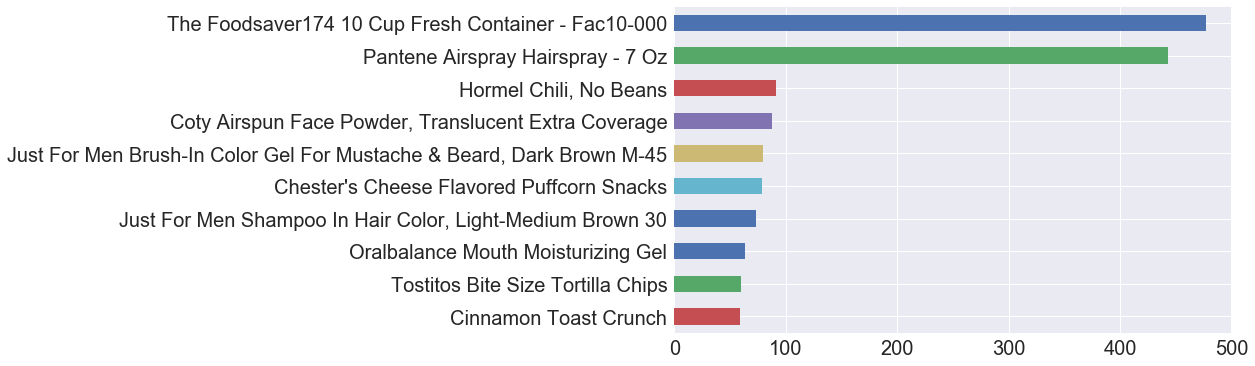

In [136]:
# 10 popular products (from 304 unique products, 3681 rows)
df['product'].value_counts()[0:10].plot(kind ='barh', figsize=[10,6], fontsize=20).invert_yaxis()

In [137]:
df[df['product'] == 'The Foodsaver174 10 Cup Fresh Container - Fac10-000']

,brand,categories,product,reviews_date,reviews_dateAdded,reviews_dateSeen,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_numHelpful,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_username
46762,Foodsaver,"Kitchen & Dining,Kitchen Storage & Organization,Food Storage,Kitchen Storage,Food Storage Containers,Household Essentials,Food Storage Bags & Containers,Paper & Disposable Plastics,Home,Home Deals,Kitchen & Dining Sale",The Foodsaver174 10 Cup Fresh Container - Fac10-000,2016-08-14T00:00:00.000Z,2017-09-18T03:37:48Z,"2017-09-08T18:03:00.000Z,2017-08-17T02:31:00.000Z,2017-07-24T17:25:00.000Z",True,False,71679291.0,NaN,1,"https://www.walmart.com/reviews/product/50754196?limit=20&sort=relevancy&page=27,https://www.walmart.com/reviews/product/50754196?limit=20&sort=relevancy&page=25,https://www.walmart.com/reviews/product/50754196?limit=20&sort=relevancy&page=23",I am thinking it is ready to use. I did not know I needed to buy more parts to make it work.,unable to use,Davepoodleman2
46763,Foodsaver,"Kitchen & Dining,Kitchen Storage & Organization,Food Storage,Kitchen Storage,Food Storage Containers,Household Essentials,Food Storage Bags & Containers,Paper & Disposable Plastics,Home,Home Deals,Kitchen & Dining Sale",The Foodsaver174 10 Cup Fresh Container - Fac10-000,2016-07-16T00:00:00.000Z,2017-09-18T03:37:48Z,"2017-09-08T18:03:00.000Z,2017-08-17T02:31:00.000Z,2017-07-24T17:25:00.000Z",True,False,69775249.0,NaN,1,"https://www.walmart.com/reviews/product/50754196?limit=20&sort=relevancy&page=28,https://www.walmart.com/reviews/product/50754196?limit=20&sort=relevancy&page=26,https://www.walmart.com/reviews/product/50754196?limit=20&sort=relevancy&page=24",I bought this a month ago. I tried vacuum sealing and the sealing stays only for 2 or 3 days. I need to reseal it again. Vacuum sealing never stays.,Not so happy,Gary66
46765,Foodsaver,"Kitchen & Dining,Kitchen Storage & Organization,Food Storage,Kitchen Storage,Food Storage Containers,Household Essentials,Food Storage Bags & Containers,Paper & Disposable Plastics,Home,Home Deals,Kitchen & Dining Sale",The Foodsaver174 10 Cup Fresh Container - Fac10-000,2016-07-29T00:00:00.000Z,2017-09-18T03:37:48Z,"2017-09-08T18:03:00.000Z,2017-08-17T02:31:00.000Z,2017-07-24T17:25:00.000Z",True,False,70601442.0,NaN,1,"https://www.walmart.com/reviews/product/50754196?limit=20&sort=relevancy&page=28,https://www.walmart.com/reviews/product/50754196?limit=20&sort=relevancy&page=26,https://www.walmart.com/reviews/product/50754196?limit=20&sort=relevancy&page=24",I cannot make heads or tails out of how to use this product. You sell parts but not what you need.,Unhappy,Davepoodleman
46768,Foodsaver,"Kitchen & Dining,Kitchen Storage & Organization,Food Storage,Kitchen Storage,Food Storage Containers,Household Essentials,Food Storage Bags & Containers,Paper & Disposable Plastics,Home,Home Deals,Kitchen & Dining Sale",The Foodsaver174 10 Cup Fresh Container - Fac10-000,2016-07-28T00:00:00.000Z,2017-09-18T03:37:48Z,"2017-09-08T18:03:00.000Z,2017-08-17T02:31:00.000Z,2017-07-24T17:25:00.000Z",True,False,70549092.0,NaN,1,"https://www.walmart.com/reviews/product/50754196?limit=20&sort=relevancy&page=28,https://www.walmart.com/reviews/product/50754196?limit=20&sort=relevancy&page=26,https://www.walmart.com/reviews/product/50754196?limit=20&sort=relevancy&page=25",I tried numerous times and it doesn't stay sealed more than 12 hours,Doesn't stay sealed,echodiva
46769,Foodsaver,"Kitchen & Dining,Kitchen Storage & Organization,Food Storage,Kitchen Storage,Food Storage Containers,Household Essentials,Food Storage Bags & Containers,Paper & Disposable Plastics,Home,Home Deals,Kitchen & Dining Sale",The Foodsaver174 10 Cup Fresh Container - Fac10-000,2016-12-17T00:00:00.000Z,2017-09-18T03:37:48Z,"2017-09-08T18:03:00.000Z,2017-08-17T02:31:00.000Z,2017-07-24T17:24:00.000Z",True,False,78439394.0,NaN,1,"https://www.walmart.com/reviews/product/50754196?limit=20&sort=relevancy&page=20,https:

In [138]:
# new df with list of users and favourite products only
df_user_product = df[['reviews_username', 'product', 'reviews_rating']]
df_user_product = df_user_product[df_user_product['reviews_rating'] == 5]
df_user_product = df_user_product.drop(columns=['reviews_rating'], axis=1)

In [143]:
df_user_product.to_csv('df_user_product.csv')

In [139]:
from collections import defaultdict
from collections import Counter
import csv

In [141]:
user_product_map = defaultdict(list)
product_user_map = defaultdict(list)

In [145]:
user_product_map

defaultdict(list,
            {'': ['reviews_username'],
             '1': ['Dorothy W'],
             '2': ['Dorothy W'],
             '23': ['Ashley A'],
             '24': ['Jp71'],
             '31': ['Birdwoman'],
             '32': ['Michelle'],
             '33': ['Jean Z'],
             '34': ['vanessa mcnally'],
             '35': ['5alarm'],
             '38': ['CynthiaCC'],
             '39': ['dfwatheartgirl'],
             '54': ['Ramona831'],
             '55': ['morgiana'],
             '622': ['JUDY'],
             '668': ['jennifer'],
             '678': ['Marsh49'],
             '684': ['preciouspaczki'],
             '700': ['briana'],
             '853': ['CarolInWonderland'],
             '859': ['Honeybearsdad'],
             '861': ['teecrump'],
             '866': ['RPBird'],
             '892': ['sights'],
             '909': ['Linda'],
             '916': ['Raffy82'],
             '920': ['windowcleaner'],
             '930': ['HappyHomeCleaning'],
           

In [144]:

with open('df_user_product.csv', 'r') as csvfile:
    w = csv.reader(csvfile, delimiter=',')
    for row in w:
        user_product_map[row[0]].append(row[1])
        product_user_map[row[1]].append(row[0])

In [ ]:
def get_similar_product(user_product_map,product_user_map,m):
    biglist = []
    for u in product_user_map[m]: # get all users that liked this product
        biglist.extend(user_product_map[u]) # find all other products those users liked and add to biglist, append list to listn
    return Counter(biglist).most_common(11)[1:] # use counter to 'count' the other products that show up most common

In [ ]:
def get_product_recommendation(user_product_map,product_user_map,u1):
    biglist = []
    for m in user_product_map[u1]: # for the products a specific user likes
        for u in product_user_map[m]: # get other users who liked those products
            biglist.extend(user_product_map[u]) # find the other products those "similar folks" most liked
    return Counter(biglist).most_common(10) # return tuples of (most common id, count)

In [ ]:
get_similar_product(user_product_map, product_user_map, 'product01')


[('product02', 5),
 ('product03', 5),
 ('product04', 5),
 ('product05', 5),
 ('product06', 5),
 ('product07', 5),
 ('product08', 5),
 ('product09', 5),
 ('product10', 5)]

In [ ]:
get_similar_product(user_product_map, product_user_map, "Pantene Pro-V Expert Collection Age Defy Conditioner")  # product

[('Bounce Dryer Sheets, Fresh Linen, 160 sheets', 1),
 ('Mitchum For Women Power Gel Antiperspirant & Deodorant, Shower Fresh', 1),
 ('Quilted Northern Ultra Plush Toilet Paper - 18 Mega Rolls', 1),
 ('Pantene Airspray Hairspray - 7 Oz', 1),
 ('Oralbalance Mouth Moisturizing Gel', 1),
 ('Tillamook Yogurt, Key Lime Lowfat Yogurt', 1)]

# **Product Recommendation**

In [ ]:
df_genuine.shape

(3682, 34)

In [ ]:
df_genuine[df_genuine['Review'].str.contains('disappoint')]
df_genuine.head(1)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,reviews_date,reviews_dateAdded,reviews_dateSeen,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_numHelpful,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_username,upc,Review,Review_WC,Review_CC,Review_AWL,product_cat,year,day,month,hour,minute,second
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,"lundbergorganiccinnamontoastricecakes/b000fvzw8y,lundbergorganiccinnamontoastricecakes/b005grcqwc,073416000391,lundbergorganiccinnamontoastricecakes/b0013jlzbu,0073416000391,lundbergorganiccinnamontoastricecakes/555222704,lundberg/00574764,lundbergorganiccinnamontoastricecakes/563800996",Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09,2017-09-23T02:53:06Z,2017-09-16T09:45:00.000Z,True,NaN,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part of a promotion.,Good,Dorothy W,73416000391,good good flavor review collect part promotion,7,46,5.714286,Food & Beverage,2017,9,7,0,0,0


In [ ]:
df_genuine['name'].value_counts()

The Foodsaver174 10 Cup Fresh Container - Fac10-000                      477
Pantene Airspray Hairspray - 7 Oz                                        443
Hormel Chili, No Beans                                                    91
Coty Airspun Face Powder, Translucent Extra Coverage                      88
Just For Men Brush-In Color Gel For Mustache & Beard, Dark Brown M-45     80
                                                                        ... 
Shea Moisture African Black Soap Problem Skin Facial Mask                  1
Season Seafood Sardine Fillets In Sweet & Tangy Sauce                      1
Attitude Stain Remover, Citrus Zest                                        1
Black Gold 90th Birthday Mylar Balloon                                     1
Kenroy Home Table Lamp - Teal                                              1
Name: name, Length: 304, dtype: int64

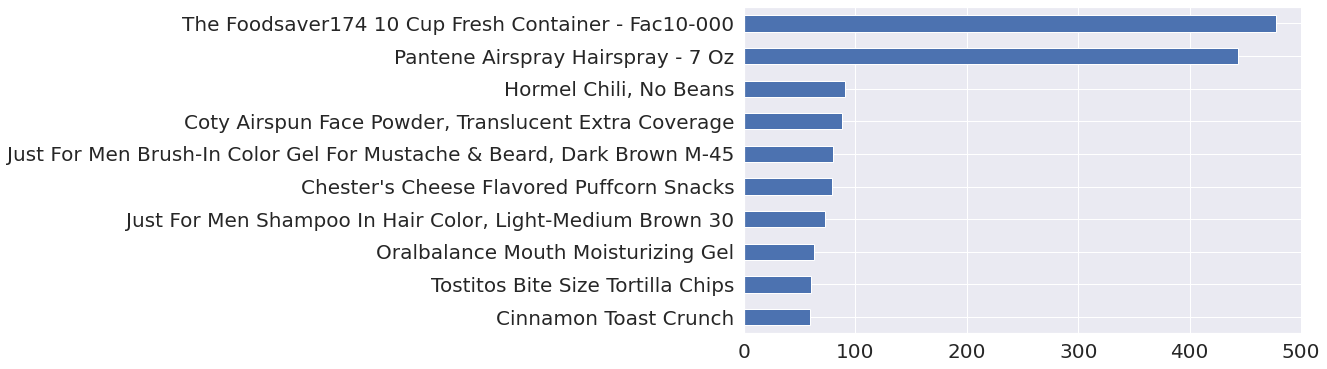

In [ ]:
# 10 popular products (from 304 unique products, 3681 rows)
df_genuine['name'].value_counts()[0:10].plot(kind = 'barh', figsize=[10,6], fontsize=20).invert_yaxis()

In [ ]:
df_genuine[df_genuine['name'] == 'The Foodsaver174 10 Cup Fresh Container - Fac10-000']
df_genuine.head(1)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,reviews_date,reviews_dateAdded,reviews_dateSeen,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_numHelpful,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_username,upc,Review,Review_WC,Review_CC,Review_AWL,product_cat,year,day,month,hour,minute,second
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,"lundbergorganiccinnamontoastricecakes/b000fvzw8y,lundbergorganiccinnamontoastricecakes/b005grcqwc,073416000391,lundbergorganiccinnamontoastricecakes/b0013jlzbu,0073416000391,lundbergorganiccinnamontoastricecakes/555222704,lundberg/00574764,lundbergorganiccinnamontoastricecakes/563800996",Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09,2017-09-23T02:53:06Z,2017-09-16T09:45:00.000Z,True,NaN,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part of a promotion.,Good,Dorothy W,73416000391,good good flavor review collect part promotion,7,46,5.714286,Food & Beverage,2017,9,7,0,0,0


### **Create Recommendation dataset**

In [ ]:
# new df with list of users and favourite products only
df_user_product = df_genuine[['reviews_username', 'name', 'reviews_rating']]
df_user_product = df_user_product[df_user_product['reviews_rating'] == 5]
df_user_product = df_user_product.drop(columns=['reviews_rating'], axis=1)
df_user_product.shape

(2677, 2)

In [ ]:
user_product_map = defaultdict(list)
product_user_map = defaultdict(list)

In [ ]:
with open('/content/drive/My Drive/df_user_product.csv', 'r') as csvfile:
    w = csv.reader(csvfile, delimiter=',')
    for row in w:
        user_product_map[row[0]].append(row[1])
        product_user_map[row[1]].append(row[0])

In [ ]:
df_user_product['reviews_username'].value_counts()

An anonymous customer    13
Sandy                     7
Mary                      6
Donna                     6
Yummy                     4
                         ..
Ottopartz                 1
WalmartLove               1
bernie                    1
Violet14                  1
Deene                     1
Name: reviews_username, Length: 2519, dtype: int64

In [ ]:
user_product_map['user05']

['product01',
 'product02',
 'product03',
 'product04',
 'product05',
 'product06',
 'product07',
 'product08',
 'product09',
 'product10']

In [ ]:
user_product_map['Donna']

['Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans',
 'Tostitos Bite Size Tortilla Chips',
 'Nexxus Exxtra Gel Style Creation Sculptor',
 "Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks",
 'Hawaiian Punch Orange Ocean Juice',
 'Jerdon 5x Led Lighted Rectangular Wall Mounted Mirror Extends 15.5']

In [ ]:
user_product_map['Mary']

['Aussie Aussome Volume Shampoo, 13.5 Oz',
 'Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz',
 "Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks",
 'Tide Original Liquid Laundry Detergent - 100 Oz',
 'Pantene Airspray Hairspray - 7 Oz',
 'Krusteaz Gluten Free Cornbread Mix And Muffin Mix - 15oz']

In [ ]:
user_product_map['Sandy']

['Pantene Pro-V Expert Collection Age Defy Conditioner',
 'Bounce Dryer Sheets, Fresh Linen, 160 sheets',
 'Mitchum For Women Power Gel Antiperspirant & Deodorant, Shower Fresh',
 'Quilted Northern Ultra Plush Toilet Paper - 18 Mega Rolls',
 'Pantene Airspray Hairspray - 7 Oz',
 'Oralbalance Mouth Moisturizing Gel',
 'Tillamook Yogurt, Key Lime Lowfat Yogurt']

In [ ]:
# all the users that liked (product key):
product_user_map['Pantene Pro-V Expert Collection Age Defy Conditioner']
# notice user 'Sandy' in there


['Loren', 'Sandy']

In [ ]:
product_user_map["Chuggington: Let's Ride The Rails"]


['lintx', 'MamaKatherine', 'littlemamac']

In [ ]:
def get_similar_product(user_product_map,product_user_map,m):
    biglist = []
    for u in product_user_map[m]: # get all users that liked this product
        biglist.extend(user_product_map[u]) # find all other products those users liked and add to biglist, append list to listn
    return Counter(biglist).most_common(11)[1:] # use counter to 'count' the other products that show up most common

In [ ]:
def get_product_recommendation(user_product_map,product_user_map,u1):
    biglist = []
    for m in user_product_map[u1]: # for the products a specific user likes
        for u in product_user_map[m]: # get other users who liked those products
            biglist.extend(user_product_map[u]) # find the other products those "similar folks" most liked
    return Counter(biglist).most_common(10) # return tuples of (most common id, count)

In [ ]:
get_similar_product(user_product_map, product_user_map, 'product01')

[('product02', 5),
 ('product03', 5),
 ('product04', 5),
 ('product05', 5),
 ('product06', 5),
 ('product07', 5),
 ('product08', 5),
 ('product09', 5),
 ('product10', 5)]

In [ ]:
get_similar_product(user_product_map, product_user_map, "Pantene Pro-V Expert Collection Age Defy Conditioner")  # product

[('Bounce Dryer Sheets, Fresh Linen, 160 sheets', 1),
 ('Mitchum For Women Power Gel Antiperspirant & Deodorant, Shower Fresh', 1),
 ('Quilted Northern Ultra Plush Toilet Paper - 18 Mega Rolls', 1),
 ('Pantene Airspray Hairspray - 7 Oz', 1),
 ('Oralbalance Mouth Moisturizing Gel', 1),
 ('Tillamook Yogurt, Key Lime Lowfat Yogurt', 1)]

In [ ]:
get_product_recommendation(user_product_map, product_user_map, 'An anonymous customer')  # user 'Joshua'

[("Chester's Cheese Flavored Puffcorn Snacks", 86),
 ('Lysol Concentrate Deodorizing Cleaner, Original Scent', 65),
 ('Yes To Carrots Nourishing Body Wash', 39),
 ('Conair Flexible Rollers Spiral Curls - 18 Count', 33),
 ('Power Crunch Protein Energy Bar Peanut Butter Creme Original', 26),
 ('Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com',
  25),
 ("L'oreal Paris Revitalift Triple Power Deep-Acting Moisturizer", 25),
 ('Mitchum For Women Power Gel Antiperspirant & Deodorant, Shower Fresh', 21),
 ('Aveeno Anti-Itch Concentrated Lotion, 4oz', 19),
 ('Doc Mcstuffins: Friendship Is The Best Medicine', 18)]